<strong>About this dataset</strong>

This dataset provides insights into the global sales of video games across different platforms and genresVgsales

Rank: Ranking of the game based on global sales. (Integer)
Name: Name of the game. (String)
Platform: Platform the game was released on. (String)
Year: Year the game was released. (Integer)
Genre: Genre of the game. (String)
Publisher: Publisher of the game. (String)
NA_Sales: Sales of the game in North America. (Float)
EU_Sales: Sales of the game in Europe. (Float)
JP_Sales: Sales of the game in Japan. (Float)
Other_Sales: Sales of the game in other regions. (Float)
Global_Sales: Total sales of the game worldwide. (Float)

This dataset helps analyze the performance and popularity of video games in different markets and across various platforms and genres.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('vgsales.csv')

<strong>Dataset Overview</strong>

In [5]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [6]:
df.tail(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<strong>Data Preprocessing</strong>

Identify and Handle the Missing Data

In [11]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [13]:
df.dropna(inplace = True)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


<strong>Exploratory Data Analysis (EDA)</strong>

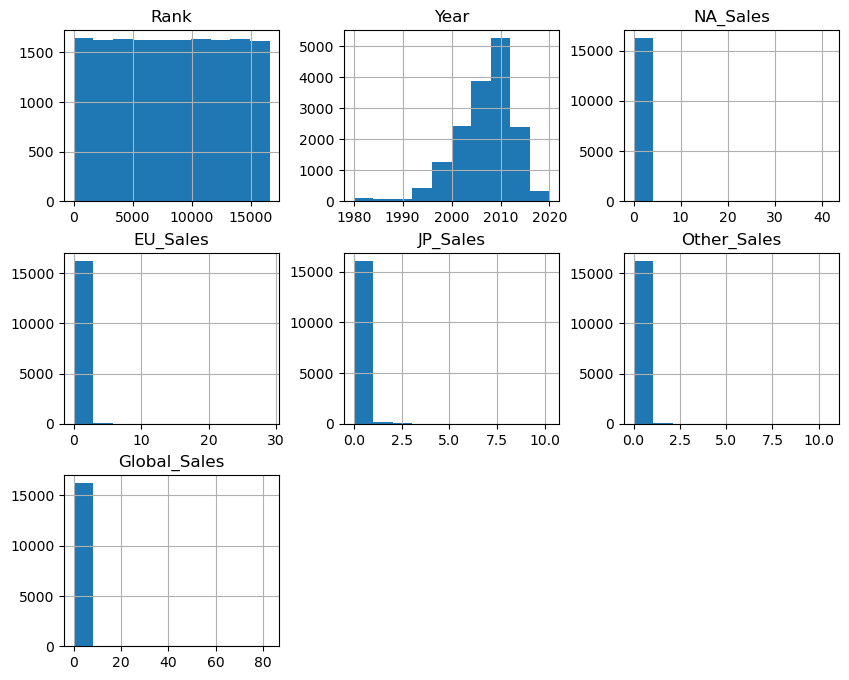

In [15]:
df.hist(figsize=(10,8))
plt.show()

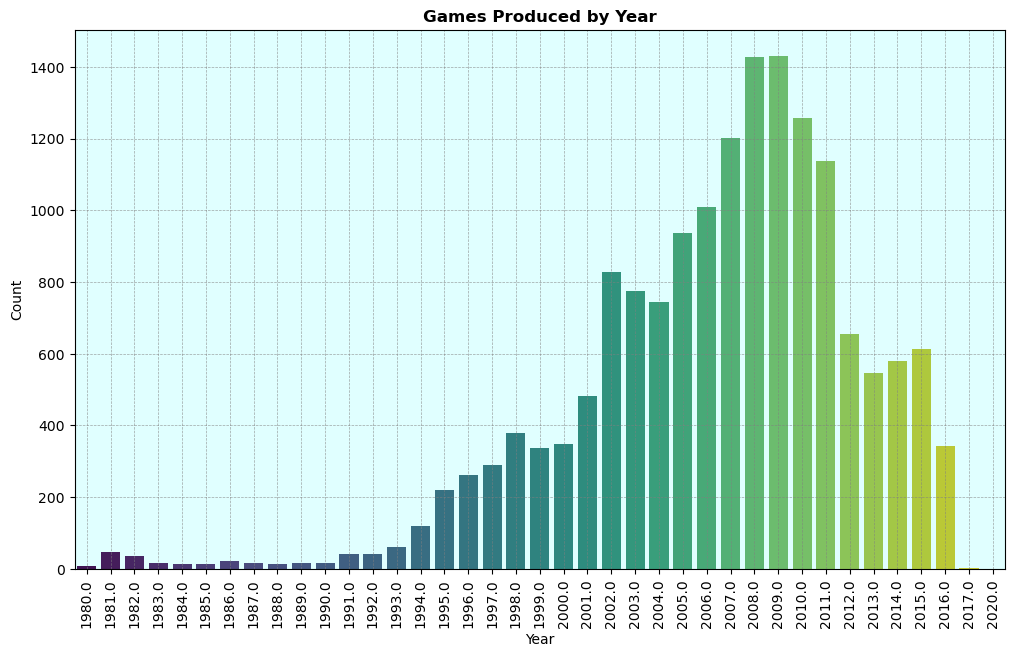

In [16]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Year', data=df, palette='viridis')

plt.title('Games Produced by Year', weight='bold')
plt.xlabel('Year')
plt.ylabel('Count')
plt.gca().set_facecolor('lightcyan')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
plt.show()

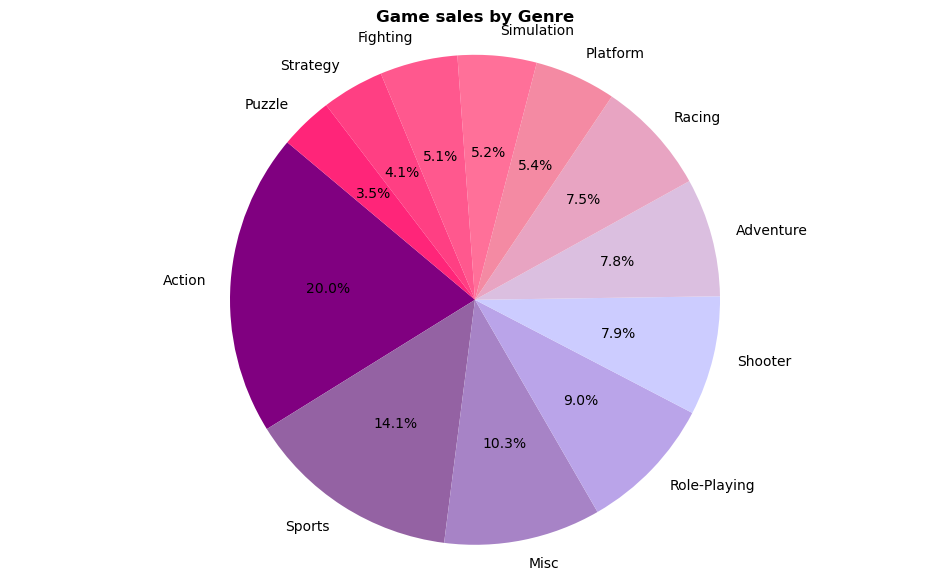

In [17]:
genre_counts = df['Genre'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(12, 7))
colors = ['#800080', '#9462A3', '#A783C6', '#BAA4E9', '#CCCCFF', 
          '#DBBFE0', '#E8A4C2', '#F48AA3', '#FF7099', '#FF588E', 
          '#FF3F83', '#FF2579']
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Game sales by Genre', weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

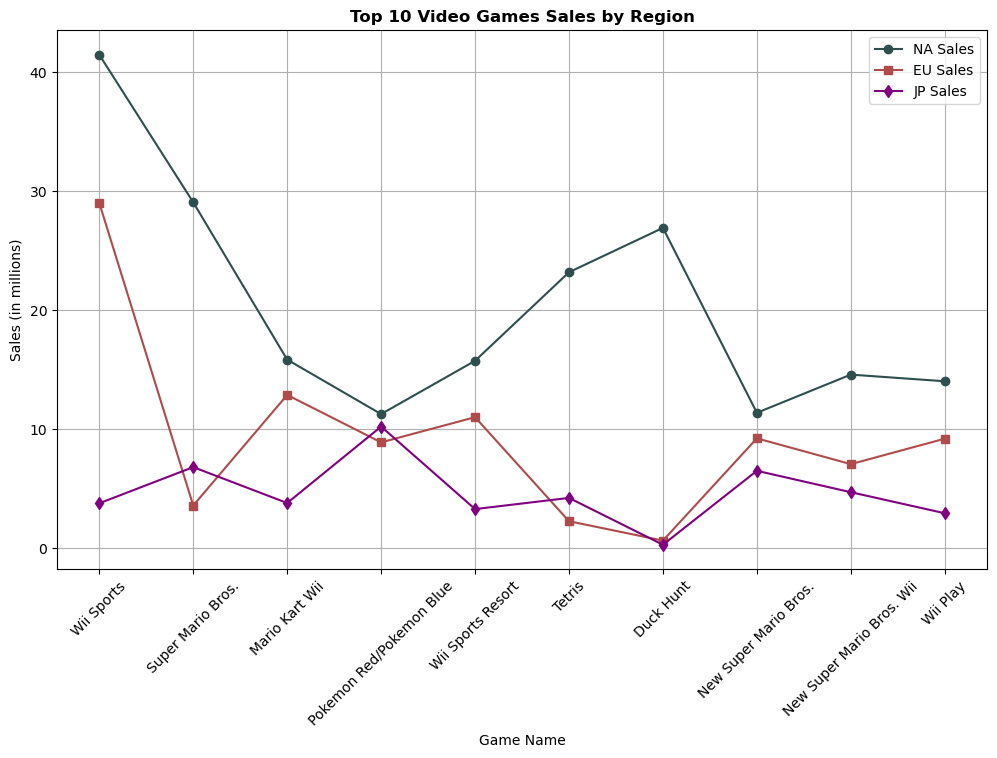

In [18]:
# Sorted by total sales and taken up the top 10
df['Total_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum(axis=1)
top_10 = df.sort_values(by='Total_Sales', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 7))

# Plotting NA, EU, JP sales for top 10 games
plt.plot(top_10['Name'], top_10['NA_Sales'], 'o-', label='NA Sales', color='#2F4F4F')  # Light Blue
plt.plot(top_10['Name'], top_10['EU_Sales'], 's-', label='EU Sales', color='#B04B4B')  # Light Green
plt.plot(top_10['Name'], top_10['JP_Sales'], 'd-', label='JP Sales', color='#800080')  # Light Pink

# Customization
plt.title('Top 10 Video Games Sales by Region', weight='bold')
plt.xlabel('Game Name')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

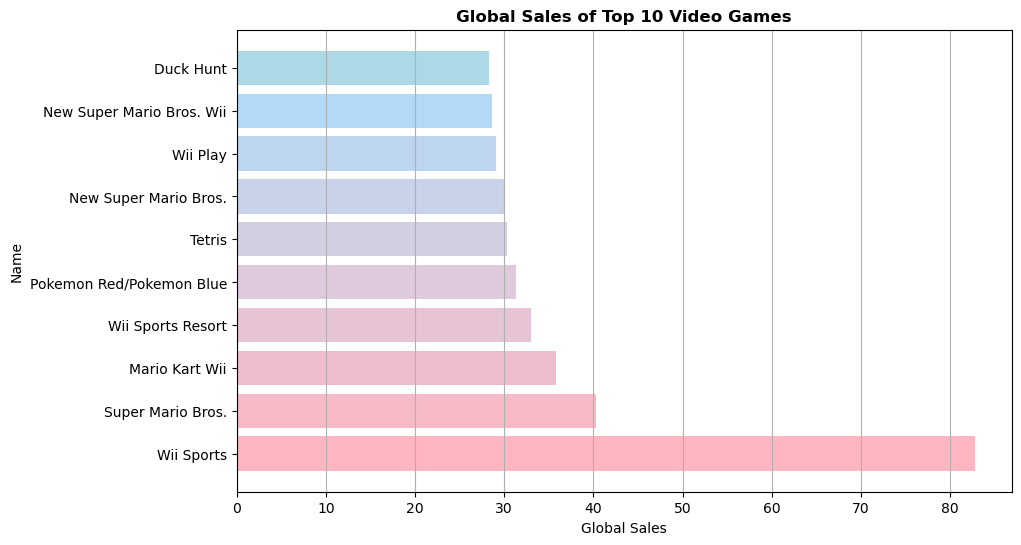

In [19]:
a = df['Name'].head(10)
b = df['Global_Sales'].head(10)
colors = ['#FFB6C1', '#F7BBC8', '#EFBECE', '#E6C3D5', '#DECADC', 
                   '#D4CEE3', '#C8D2E9', '#BDD5EF', '#B2D9F5', '#ADD8E6']


# Plotting
plt.figure(figsize=(10, 6))
plt.barh(a, b, color = colors)

plt.title('Global Sales of Top 10 Video Games', weight='bold')
plt.xlabel('Global Sales')
plt.ylabel('Name')
plt.grid(True, axis='x')
plt.show()

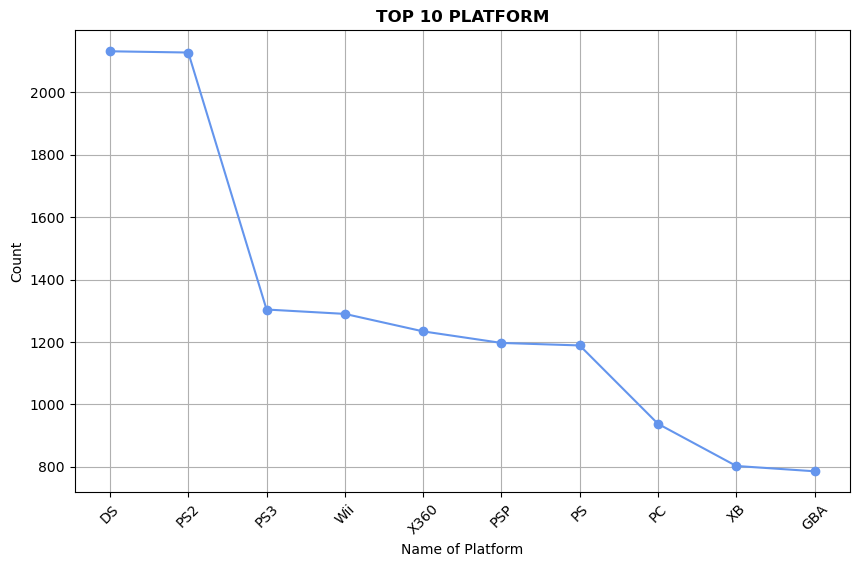

In [20]:
top10_platform = df['Platform'].value_counts().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(top10_platform.index, top10_platform.values, marker='o', linestyle='-', color='#6495ED')
plt.title('TOP 10 PLATFORM', weight='bold')
plt.xlabel('Name of Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

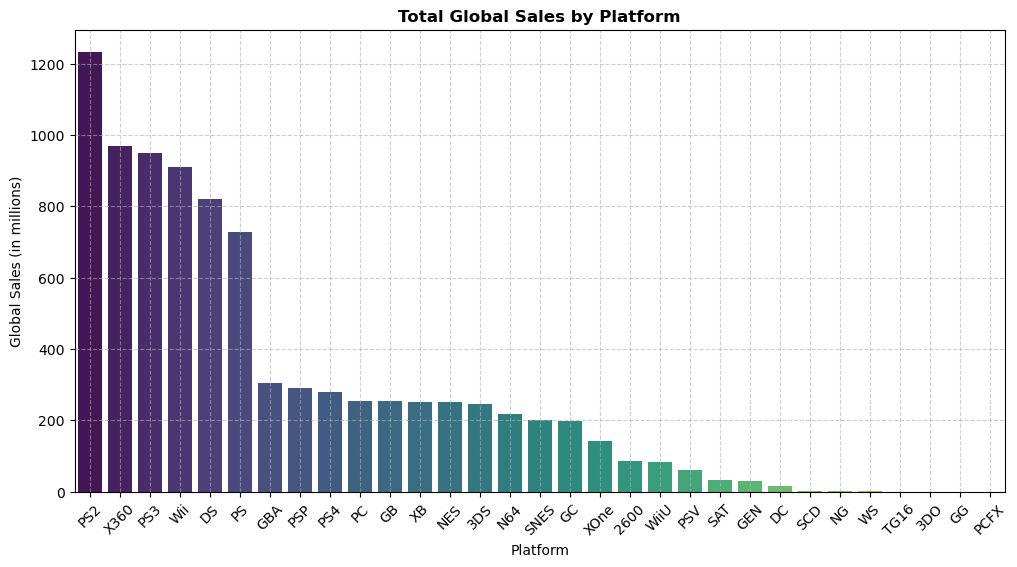

In [21]:
grouped_data = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', data=grouped_data, palette='viridis')

plt.title('Total Global Sales by Platform', weight='bold')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [22]:
a= ['NA_Sales', 'EU_Sales', 'JP_Sales']
df[a].corr()

,NA_Sales,EU_Sales,JP_Sales
NA_Sales,1.000000,0.768923,0.451283
EU_Sales,0.768923,1.000000,0.436379
JP_Sales,0.451283,0.436379,1.000000


<Axes: >

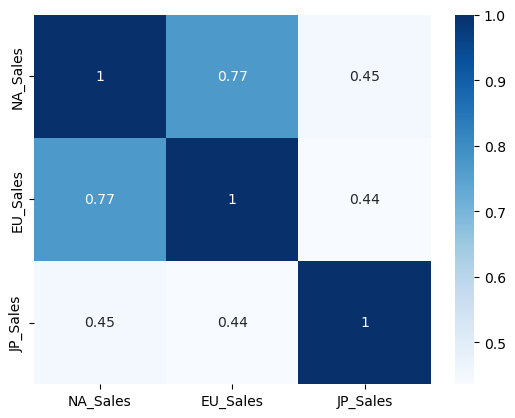

In [23]:
sns.heatmap(df[a].corr(),annot=True,  cmap='Blues')

<strong></strong>

<strong>Prediction of Global Sales by using
1. Linear Regression
2. Logistic Regression
3. K-Nearest Neighbors (KNN)
4. Decision Tree</strong>

<strong>_Linear Regression_</strong>

In [27]:
X = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

In [28]:
X

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2006.0,41.49,29.02,3.77,8.46
1,1985.0,29.08,3.58,6.81,0.77
2,2008.0,15.85,12.88,3.79,3.31
3,2009.0,15.75,11.01,3.28,2.96
4,1996.0,11.27,8.89,10.22,1.00
...,...,...,...,...,...
16593,2002.0,0.01,0.00,0.00,0.00
16594,2003.0,0.01,0.00,0.00,0.00
16595,2008.0,0.00,0.00,0.00,0.00
16596,2010.0,0.00,0.01,0.00,0.00


In [29]:
y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16291, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
df.shape

(16291, 12)

In [32]:
X_train

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13100,2016.0,0.01,0.03,0.00,0.01
6577,2011.0,0.12,0.08,0.02,0.04
5632,1995.0,0.00,0.00,0.32,0.00
9435,2005.0,0.09,0.03,0.00,0.00
1441,2009.0,0.59,0.57,0.05,0.14
...,...,...,...,...,...
13655,2011.0,0.00,0.00,0.04,0.00
5474,2003.0,0.25,0.07,0.00,0.01
870,2006.0,1.09,0.65,0.02,0.20
16087,2008.0,0.00,0.00,0.01,0.00


In [33]:
X_test

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3527,2008.0,0.52,0.01,0.00,0.04
12216,2014.0,0.00,0.04,0.02,0.00
7940,2015.0,0.00,0.00,0.19,0.00
3030,2011.0,0.44,0.16,0.00,0.07
7144,2001.0,0.16,0.06,0.00,0.00
...,...,...,...,...,...
13174,2016.0,0.02,0.02,0.00,0.00
12812,2004.0,0.04,0.01,0.00,0.00
738,2008.0,1.28,0.68,0.02,0.21
12301,1997.0,0.04,0.02,0.00,0.00


In [34]:
y_train.shape

(12218,)

In [35]:
y_test.shape

(4073,)

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0.5702531 , 0.06027517, 0.19030527, ..., 2.18995267, 0.06037046,
       0.13029567])

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
print(mean_squared_error(y_pred,y_test))

2.8299338230466656e-05


In [40]:
print(mean_absolute_error(y_pred,y_test))

0.003022107280230654


In [41]:
r2_score(y_pred,y_test)

0.9999921891616732

<strong>Logistic Regression</strong>

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
# Binarize the target variable
threshold = 1.0  
df['High_Sales'] = df['Global_Sales'].apply(lambda x: 1 if x > threshold else 0)
X = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['High_Sales']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9968082494475816


In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Generate the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3585
           1       1.00      0.97      0.99       488

    accuracy                           1.00      4073
   macro avg       1.00      0.99      0.99      4073
weighted avg       1.00      1.00      1.00      4073

Confusion Matrix:
[[3585    0]
 [  13  475]]


<strong>KNN</strong>

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred = model.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9840412472379082


In [55]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Generate the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3585
           1       0.97      0.90      0.93       488

    accuracy                           0.98      4073
   macro avg       0.98      0.95      0.96      4073
weighted avg       0.98      0.98      0.98      4073

Confusion Matrix:
[[3570   15]
 [  50  438]]


<strong>Decision Tree</strong>

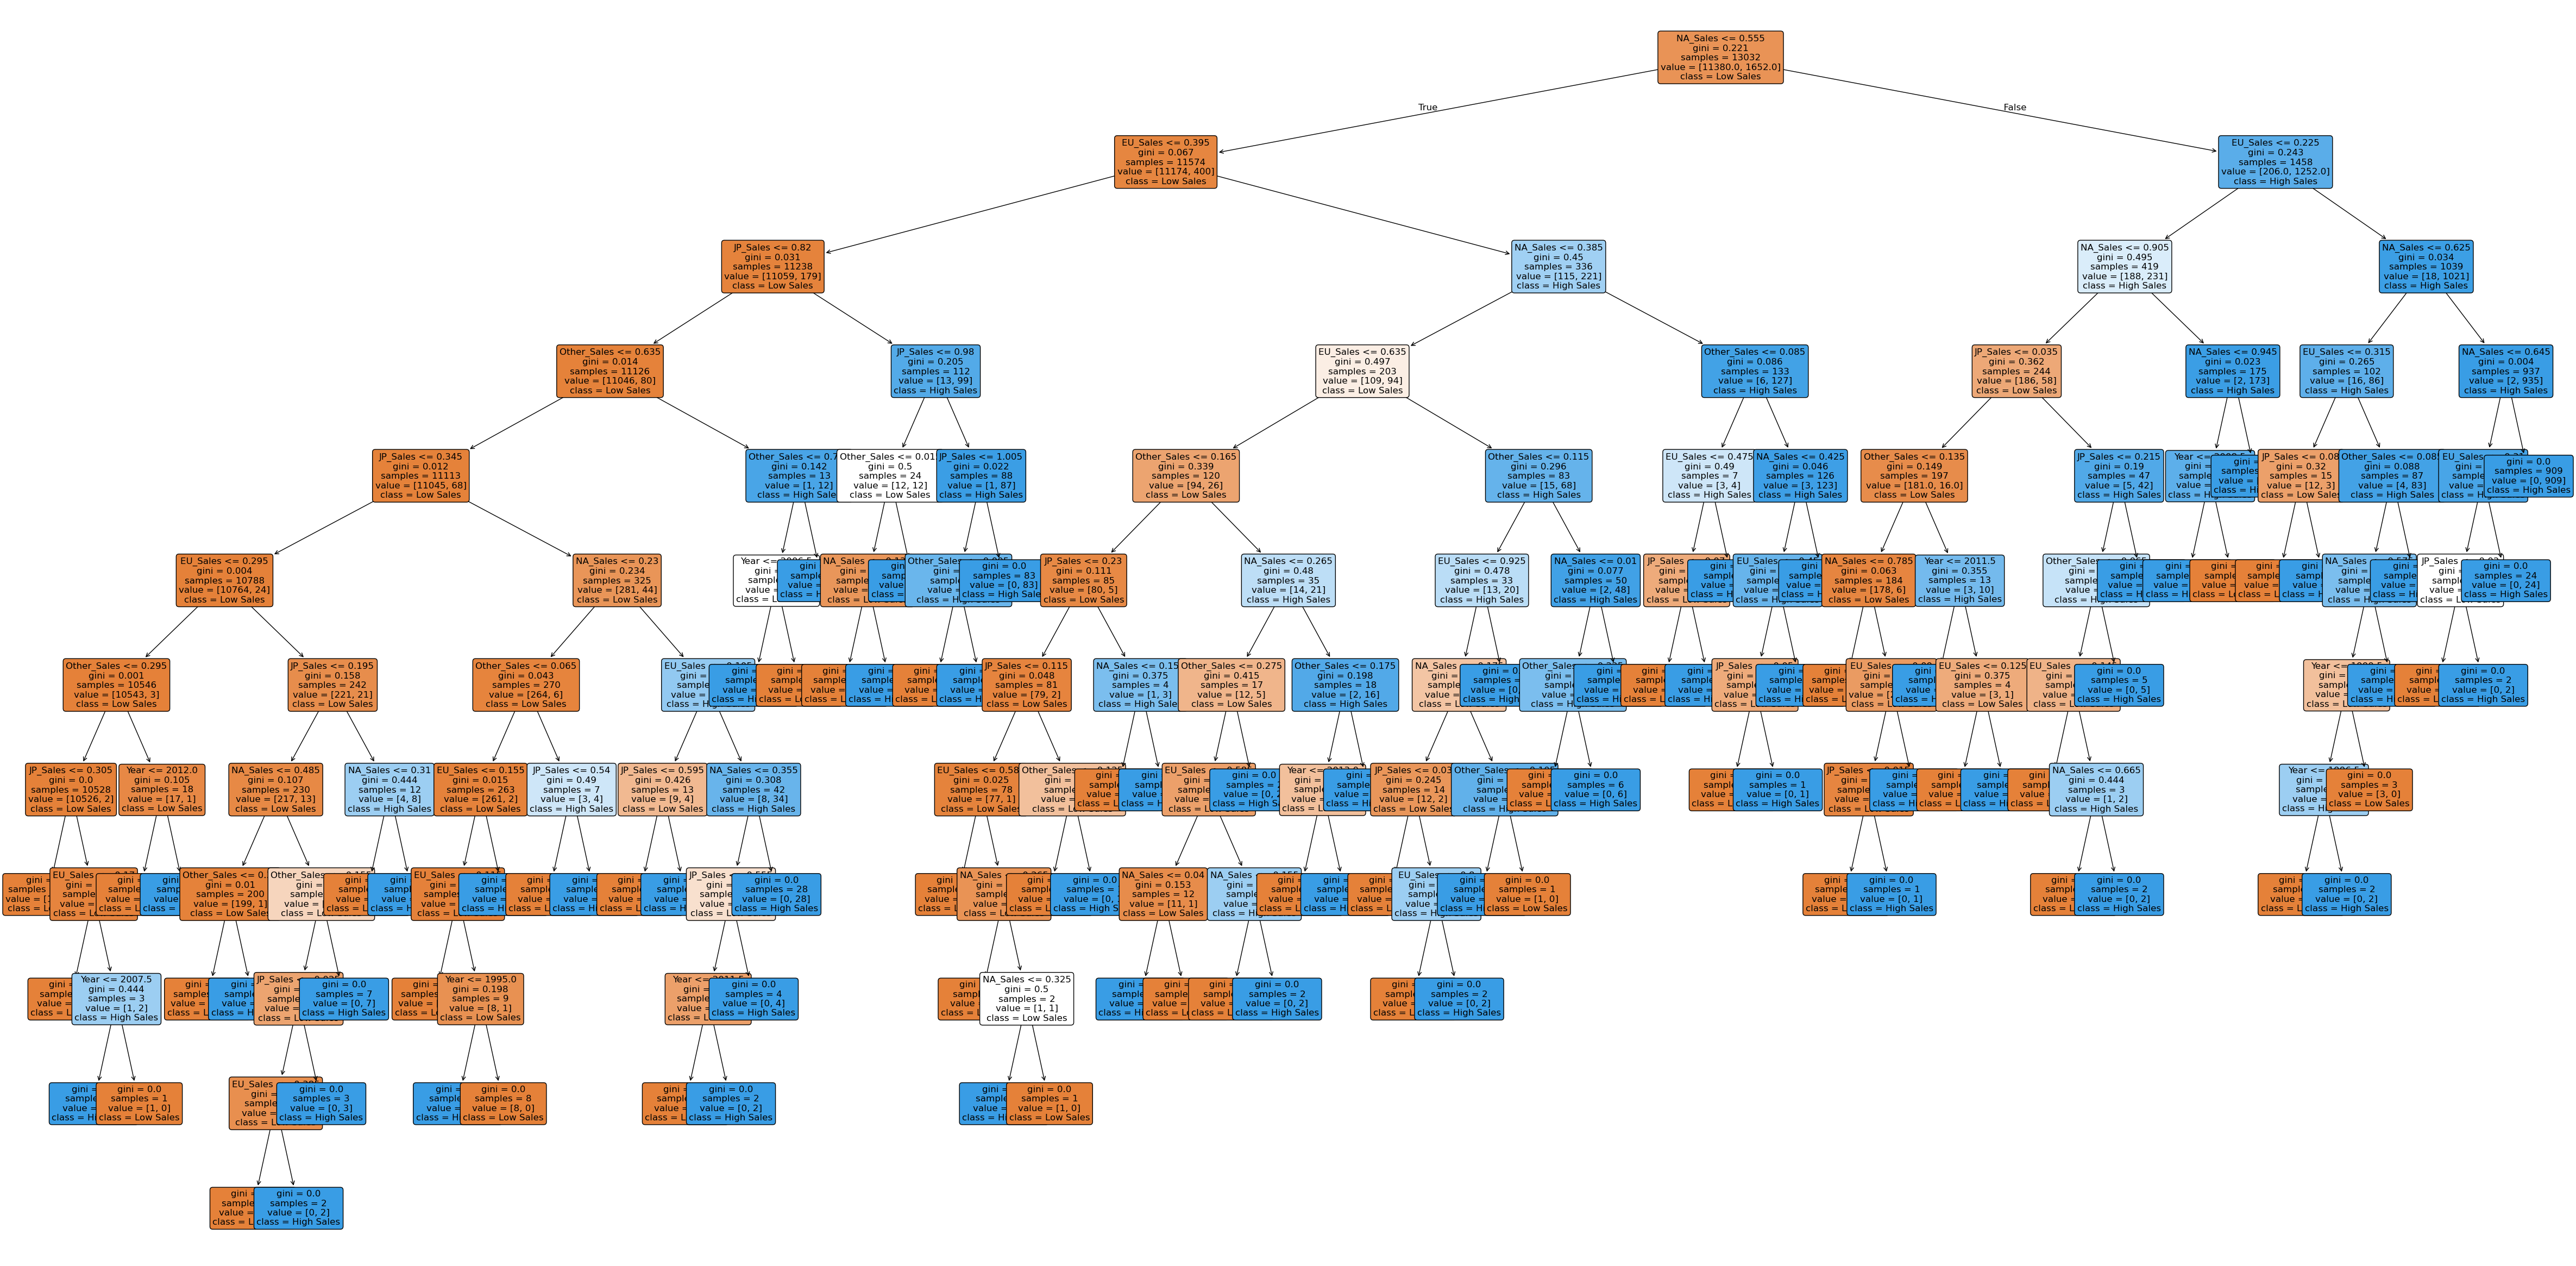

Accuracy: 0.9920220926664621


In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(60, 30))
plot_tree(model, feature_names=X.columns, class_names=['Low Sales', 'High Sales'], filled=True, rounded=True, fontsize=12)
plt.show()

# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


<strong>Conclusion</strong>

In this project, we delved into an extensive dataset of video game sales across various platforms and genres. Our analysis aimed to uncover trends and patterns that could help predict sales performance and identify factors contributing to a game's success.

Our analysis utilized the KNN algorithm, which proved to be the most accurate method for predicting game sales based on proximity to similar games in the dataset. This result emphasizes the effectiveness of KNN in classifying and predicting outcomes in datasets with similar characteristics.